In [1]:
import cv2
import tensorflow as tf
# import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [5]:
data_directory = '/content/drive/MyDrive/project'

# Create an image dataset from the directory
data = tf.keras.utils.image_dataset_from_directory(data_directory)

Found 5731 files belonging to 3 classes.


In [34]:
data_iterator = data.as_numpy_iterator()

In [35]:
batch = data_iterator.next()

In [36]:
# fig , ax = plt.subplots(ncols=4 , figsize=(20,20))
# for idx , img in enumerate (batch[0][:4]):
#   ax[idx].imshow(img.astype(int))
#   ax[idx].title.set_text(batch[1][idx])

In [37]:
data = data.map(lambda x,y : (x/255 ,y ))

In [38]:
data.as_numpy_iterator().next()

(array([[[[3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          ...,
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03]],
 
         [[3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          ...,
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03]],
 
         [[3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          ...,
          [3.9215689e-03, 3.9215689e-03, 3.9215689e-03],
          [3.9215689e-03, 3.9215689e-

In [39]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.3)

In [40]:
val_size

36

In [41]:
train= data.take(train_size)
val= data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [42]:
val

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

In [44]:
model= Sequential()

In [45]:
model.add(Conv2D(16,(3,3),1 , activation='relu',padding='same', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,padding='same',activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [46]:
model.compile('sgd',loss=tf.keras.losses.BinaryCrossentropy(),metrics='accuracy')

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 16)       

In [49]:
logdir = 'logs'

In [50]:
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [51]:
tensorboard_callback

In [52]:
hist= model.fit(train, epochs=50,validation_data=val , callbacks=[tensorboard_callback])

Epoch 1/50
125/125 [==============================] - 38s 289ms/step - loss: 0.5567 - accuracy: 0.2655 - val_loss: 0.5030 - val_accuracy: 0.2882
Epoch 2/50
125/125 [==============================] - 39s 306ms/step - loss: 0.5298 - accuracy: 0.2657 - val_loss: 0.5175 - val_accuracy: 0.2856
Epoch 3/50
125/125 [==============================] - 37s 293ms/step - loss: 0.5182 - accuracy: 0.2655 - val_loss: 0.4687 - val_accuracy: 0.2891
Epoch 4/50
125/125 [==============================] - 35s 277ms/step - loss: 0.5243 - accuracy: 0.2640 - val_loss: 0.4643 - val_accuracy: 0.2917
Epoch 5/50
125/125 [==============================] - 36s 285ms/step - loss: 0.5198 - accuracy: 0.2670 - val_loss: 0.4938 - val_accuracy: 0.2995
Epoch 6/50
125/125 [==============================] - 35s 278ms/step - loss: 0.5222 - accuracy: 0.2645 - val_loss: 0.4777 - val_accuracy: 0.2804
Epoch 7/50
125/125 [==============================] - 35s 271ms/step - loss: 0.5201 - accuracy: 0.2677 - val_loss: 0.4947 - val_ac

In [53]:
from tensorflow.keras.metrics import Precision , Recall , BinaryAccuracy

In [54]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [55]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat=model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 71ms/step


In [56]:
print(pre.result(), re.result(),acc.result())

tf.Tensor(0.5215889, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.25561312, shape=(), dtype=float32)


In [57]:
# Test

TypeError: Image data of dtype object cannot be converted to float

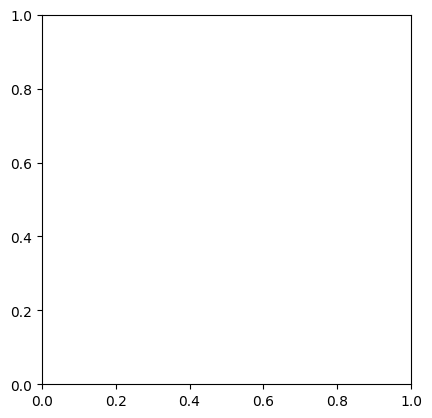

In [58]:
img = cv2.imread('/content/drive/MyDrive/proj/Colgate/Bard_Generated_Image (1)_0_2442.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize= tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat=model.predict(np.expand_dims(resize/255,0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5:
  print('Predicted Image is Fake ')
else:
  print('Predicted Image is Original')


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Dataset/Fake Logos/Ariel')
plt.imshow(img)
resize= tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

In [ ]:
if yhat > 0.5:
  print('Predicted Image is Fake ')
else:
  print('Predicted Image is Original')

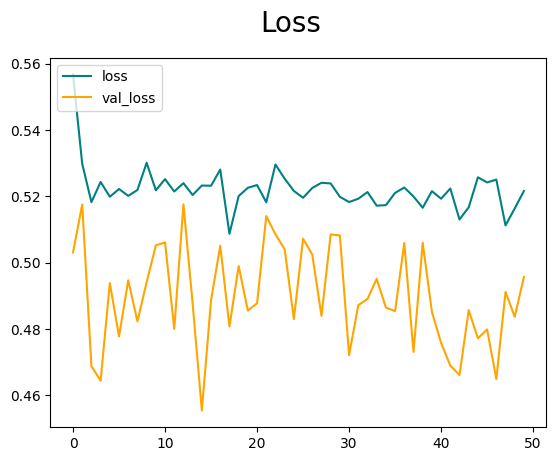

In [59]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

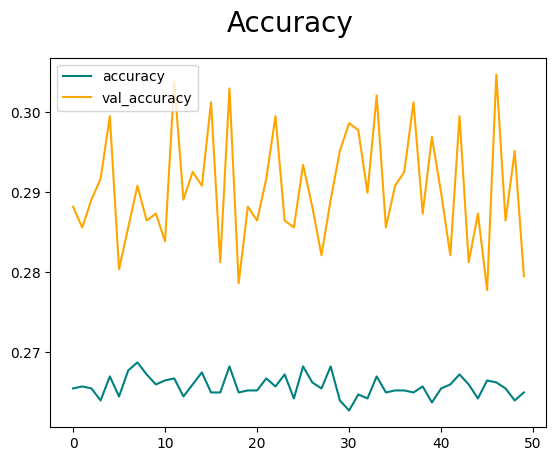

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()